In [1]:
#Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Pulling Data from CSV
file = "archive/winemag-data-130k-v2.csv"
#Creating Base Dataframe
df = pd.read_csv(file, index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Index,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [3]:
#Dropping usless columns
df = df.drop(columns= ['region_2', 'taster_twitter_handle'])
df

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
Index,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [4]:
#Reorganizing order of header
df = df[['winery','title','variety','country','province','region_1','price','points','taster_name','description', 'designation']]
df

,winery,title,variety,country,province,region_1,price,points,taster_name,description,designation
Index,,,,,,,,,,,
0,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Italy,Sicily & Sardinia,Etna,NaN,87,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [5]:
#Renaming/Cleaning headers 
df = df.rename(columns={'variety': 'Grape Type',
                       'region_1': 'Sub-Region',
                       'taster_name': 'Wine Critic',
                       'designation': 'Additional Designations',
                       'winery': 'Winery',
                       'title': 'Name of Wine',
                       })
df

,Winery,Name of Wine,Grape Type,country,province,Sub-Region,price,points,Wine Critic,description,Additional Designations
Index,,,,,,,,,,,
0,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Italy,Sicily & Sardinia,Etna,NaN,87,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [6]:
#Cleaning Headers
df.columns = df.columns.str.title()

In [7]:
df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
0,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Italy,Sicily & Sardinia,Etna,NaN,87,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [8]:
#Dropping Nan values in important data metrics 
df = df.dropna(axis=0, how= 'any', subset= ['Price','Points','Wine Critic'])
df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
5,Tandem,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Spain,Northern Spain,Navarra,15.0,87,Michael Schachner,Blackberry and raspberry aromas show a typical...,Ars In Vitro
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [9]:
df.describe()

,Price,Points
count,96479.000000,96479.000000
mean,34.998642,88.585723
std,43.057234,2.951305
min,4.000000,80.000000
25%,17.000000,87.000000
50%,25.000000,88.000000
75%,40.000000,91.000000
max,3300.000000,100.000000


In [10]:
country_group = df.groupby(by= 'Country')
country_df = country_group.mean()
country_df

,Price,Points
Country,,
Argentina,24.452438,86.707701
Armenia,14.500000,87.500000
Australia,37.492277,88.805680
Austria,30.782157,90.204228
Bosnia and Herzegovina,12.500000,86.500000
Brazil,23.765957,84.659574
Bulgaria,14.645390,87.936170
Canada,35.636364,89.367589
Chile,20.869686,86.514286


In [12]:
price_df = country_df.sort_values(by= 'Price')
price_df

,Price,Points
Country,,
Ukraine,9.214286,84.071429
Bosnia and Herzegovina,12.500000,86.500000
India,13.333333,90.222222
Armenia,14.500000,87.500000
Bulgaria,14.645390,87.936170
Romania,15.241667,86.400000
Macedonia,15.583333,86.833333
Slovakia,16.000000,87.000000
Cyprus,16.272727,87.181818


<AxesSubplot:xlabel='Country'>

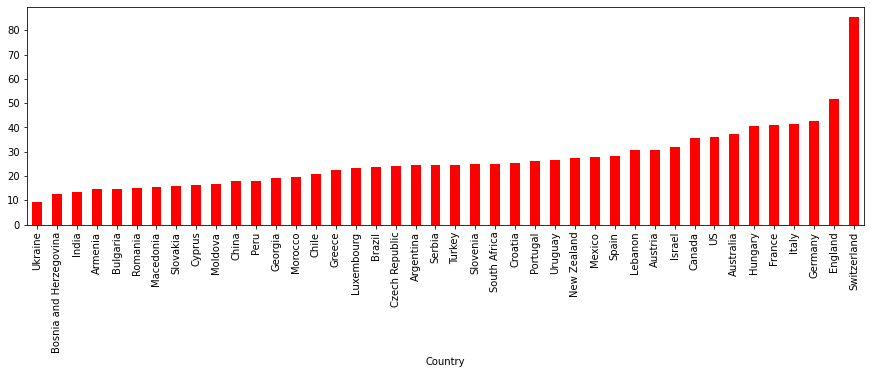

In [40]:
    price_df["Price"].plot(kind="bar", facecolor="red", figsize=(15,4))

In [36]:
swiss_df = df[df['Country'] == 'Switzerland']
swiss_df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
14187,Robert Gilliard,Robert Gilliard 2012 Dôle des Monts Pinot Noir...,Pinot Noir-Gamay,Switzerland,Valais,NaN,30.0,90,Jeff Jenssen,"A Swiss blend of Pinot Noir and Gamay, this de...",Dôle des Monts
21791,Gantenbein,Gantenbein 2011 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine is cherry red with soft brown tinges...,NaN
32423,Gantenbein,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine has a bouquet of tart cherry with a ...,NaN
50589,Delea,Delea 2004 Carato Merlot (Ticino),Merlot,Switzerland,Ticino,NaN,38.0,83,Susan Kostrzewa,"A soft blackberry, vanilla and plum nose is fo...",Carato
81814,Gantenbein,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine has a bouquet of tart cherry with a ...,NaN
83632,Robert Gilliard,Robert Gilliard 2012 Les Murettes Chasselas (V...,Chasselas,Switzerland,Valais,NaN,28.0,90,Jeff Jenssen,Vanilla and lemon curd aromas bring nuance and...,Les Murettes
129280,Château d'Auvernier,Château d'Auvernier 2012 White (Neuchâtel),White Blend,Switzerland,Neuchâtel,NaN,21.0,90,Jeff Jenssen,The bouquet of this wine shows condensed fruit...,NaN


In [38]:
swiss_df.describe()

,Price,Points
count,7.000000,7.000000
mean,85.285714,88.571429
std,70.063577,2.507133
min,21.000000,83.000000
25%,29.000000,89.000000
50%,38.000000,89.000000
75%,160.000000,90.000000
max,160.000000,90.000000


In [16]:
points_df = country_df.sort_values(by= 'Points')
points_df

,Price,Points
Country,,
Peru,18.062500,83.562500
Ukraine,9.214286,84.071429
Brazil,23.765957,84.659574
Mexico,27.800000,85.261538
Romania,15.241667,86.400000
Bosnia and Herzegovina,12.500000,86.500000
Chile,20.869686,86.514286
Argentina,24.452438,86.707701
Uruguay,26.403670,86.752294


<AxesSubplot:xlabel='Country'>

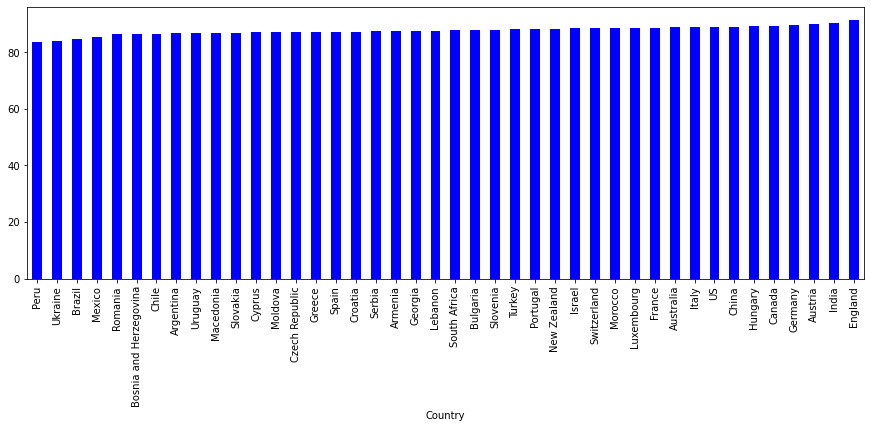

In [17]:
points_df["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5))